In [ ]:
import re
import pandas as pd

In [ ]:
f=open('/content/whatsapp_chat_g.txt','r',encoding='utf-8')

In [ ]:
data=f.read()

In [ ]:
pattern= '\d{1,2}/\d{1,2}/\d{2},\s\d{2}:\d{2}\s-\s'

In [ ]:
messages= re.split(pattern,data)[1:]


In [ ]:
dates= re.findall(pattern,data)
dates

['4/26/21, 12:01 - ',
 '4/26/21, 12:01 - ',
 '4/28/21, 23:58 - ',
 '4/28/21, 23:58 - ',
 '4/28/21, 23:58 - ',
 '5/1/21, 22:32 - ',
 '5/1/21, 22:33 - ',
 '5/1/21, 22:34 - ',
 '5/1/21, 22:34 - ',
 '5/5/21, 08:22 - ',
 '5/5/21, 08:22 - ',
 '5/8/21, 11:57 - ',
 '5/9/21, 12:03 - ',
 '5/13/21, 19:53 - ',
 '5/13/21, 19:54 - ',
 '5/22/21, 12:58 - ',
 '5/25/21, 22:25 - ',
 '5/28/21, 13:05 - ',
 '6/2/21, 12:26 - ',
 '6/2/21, 12:27 - ',
 '6/2/21, 12:27 - ',
 '6/2/21, 12:27 - ',
 '6/2/21, 12:28 - ',
 '6/3/21, 13:24 - ',
 '6/3/21, 13:24 - ',
 '6/3/21, 13:24 - ',
 '6/3/21, 13:24 - ',
 '6/6/21, 18:31 - ',
 '6/6/21, 18:31 - ',
 '6/6/21, 18:32 - ',
 '6/6/21, 18:33 - ',
 '6/8/21, 22:10 - ',
 '6/8/21, 22:10 - ',
 '6/8/21, 22:10 - ',
 '6/8/21, 22:10 - ',
 '6/8/21, 22:12 - ',
 '6/9/21, 13:17 - ',
 '6/9/21, 13:28 - ',
 '6/10/21, 08:15 - ',
 '6/10/21, 08:16 - ',
 '6/10/21, 08:17 - ',
 '6/10/21, 08:17 - ',
 '6/10/21, 08:43 - ',
 '6/10/21, 08:45 - ',
 '6/12/21, 15:58 - ',
 '6/12/21, 15:58 - ',
 '6/12/21, 16:03

In [ ]:
df=pd.DataFrame({'user_message':messages,'message_date': dates})
#convert message_date type

df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.tail()


,user_message,date
3218,Child: <Media omitted>\n,2024-03-26 16:09:00
3219,Child: <Media omitted>\n,2024-03-26 16:09:00
3220,Child: <Media omitted>\n,2024-03-26 16:09:00
3221,Child: <Media omitted>\n,2024-03-26 16:09:00
3222,Child: <Media omitted>\n,2024-03-26 16:09:00


In [ ]:
df.shape

(3223, 2)

In [ ]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])

    else:
        users.append('group_notification')
        messages.append(entry[0])



df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

df.tail()


,date,user,message
3218,2024-03-26 16:09:00,Child,<Media omitted>\n
3219,2024-03-26 16:09:00,Child,<Media omitted>\n
3220,2024-03-26 16:09:00,Child,<Media omitted>\n
3221,2024-03-26 16:09:00,Child,<Media omitted>\n
3222,2024-03-26 16:09:00,Child,<Media omitted>\n


In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df.tail()

,date,user,message
3218,2024-03-26 16:09:00,Child,<Media omitted>\n
3219,2024-03-26 16:09:00,Child,<Media omitted>\n
3220,2024-03-26 16:09:00,Child,<Media omitted>\n
3221,2024-03-26 16:09:00,Child,<Media omitted>\n
3222,2024-03-26 16:09:00,Child,<Media omitted>\n


In [ ]:
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute


In [ ]:
print('Total number of chats: ', df.shape[0])

Total number of chats:  3223


In [ ]:
c=df[df['user']=='Child'].shape
print('messages by child: ',c)

messages by child:  (1200, 8)


In [ ]:
m=df[df['user']=='Mom'].shape
print('messages by moms: ',m)

messages by moms:  (2022, 8)


In [ ]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [ ]:
print('total number of words in chat: ',len(words))

total number of words in chat:  9514


In [ ]:
media_count=df[df['message']=='<Media omitted>\n'].shape[0]
print('total media files shared: ',media_count)

total media files shared:  1316


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

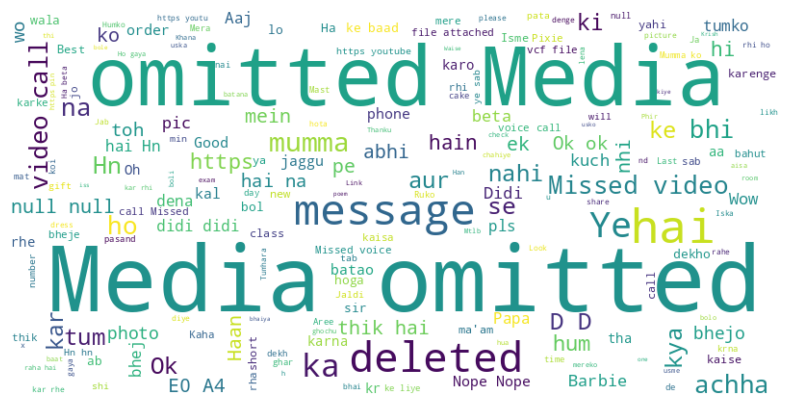

In [ ]:
all_messages = " ".join(df["message"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
new_df=df[df['user'] != 'group_notification']
new_df = new_df[new_df['message'] != '<Media omitted>\n']
new_df = new_df[new_df['message'] != 'This message was deleted\n']


# Here, '~' negates the condition, so it selects rows that do not contain the particular string
# Replace 'particular_string' with the string you want to filter out

# Print the new DataFrame

In [ ]:
new_df.shape

(1809, 8)

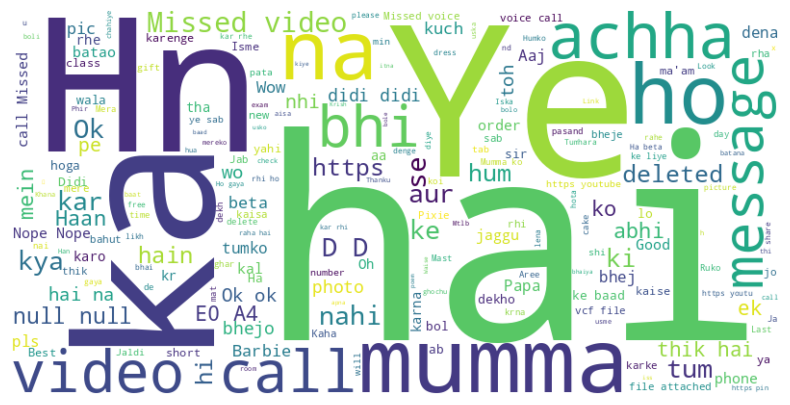

In [ ]:
new_all_messages = " ".join(new_df["message"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(new_all_messages)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()

In [ ]:
new_words=[]
for message in new_df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            new_words.append(word)

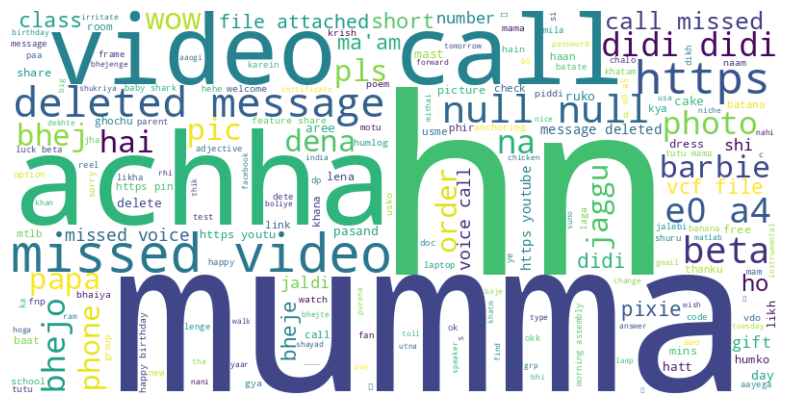

In [ ]:
no_stopword_messages = " ".join(new_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(no_stopword_messages)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.0 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
emojis = []

for message in df['message']:
    emojis.extend(emoji.emoji_list(message))

print(emojis)

[{'match_start': 0, 'match_end': 1, 'emoji': '😜'}, {'match_start': 1, 'match_end': 2, 'emoji': '🤪'}, {'match_start': 2, 'match_end': 3, 'emoji': '😝'}, {'match_start': 3, 'match_end': 4, 'emoji': '💩'}, {'match_start': 4, 'match_end': 5, 'emoji': '🤡'}, {'match_start': 5, 'match_end': 6, 'emoji': '👻'}, {'match_start': 6, 'match_end': 7, 'emoji': '💀'}, {'match_start': 7, 'match_end': 9, 'emoji': '☠️'}, {'match_start': 9, 'match_end': 10, 'emoji': '👽'}, {'match_start': 10, 'match_end': 11, 'emoji': '👾'}, {'match_start': 11, 'match_end': 12, 'emoji': '🤖'}, {'match_start': 12, 'match_end': 13, 'emoji': '👺'}, {'match_start': 13, 'match_end': 14, 'emoji': '👹'}, {'match_start': 14, 'match_end': 15, 'emoji': '👿'}, {'match_start': 15, 'match_end': 16, 'emoji': '😈'}, {'match_start': 16, 'match_end': 17, 'emoji': '🥴'}, {'match_start': 17, 'match_end': 18, 'emoji': '🤢'}, {'match_start': 18, 'match_end': 19, 'emoji': '🤮'}, {'match_start': 19, 'match_end': 20, 'emoji': '🤧'}, {'match_start': 20, 'match_

In [ ]:
only_emojis = [data['emoji'] for data in emojis]

print(only_emojis)

['😜', '🤪', '😝', '💩', '🤡', '👻', '💀', '☠️', '👽', '👾', '🤖', '👺', '👹', '👿', '😈', '🥴', '🤢', '🤮', '🤧', '😷', '🤐', '😵', '😪', '🤒', '🤕', '📷', '📸', '🥵', '😛', '🤦🏻\u200d♀️', '🤦🏻\u200d♀️', '🤦🏻\u200d♀️', '🥴', '😷', '☝🏻', '☝🏻', '☝🏻', '☝🏻', '🧐', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '🙏', '😂', '😂', '😂', '🅰', '🅿', '🅿', '🅰', '🙂', '🥳', '🥳', '🥳', '🥳', '🥳', '🥳', '🥳', '🎊', '🎊', '🎊', '🎉', '🎉', '🎉', '🎉', '🎉', '😄', '😄', '😄', '😄', '😆', '😆', '😆', '😆', '🤟', '🤟', '🤟', '✌️', '✌️', '✌️', '👅', '👅', '👅', '👅', '👅', '👅', '😂', '😂', '😂', '😘', '😘', '😘', '😘', '😋', '😋', '😂', '👍', '💩', '😍', '🤤', '😋', '🤤', '🍕', '😱', '😱', '😱', '💩', '😱', '😱', '🥶', '😘', '😘', '😘', '😘', '😘', '😘', '😘', '😣', '😖', '😫', '😩', '😠', '😡', '🤬', '🤯', '🥺', '🥺', '😍', '🤩', '😂', '😂', '🤢', '🤮', '🤢', '🤮', '🥱', '🤦🏻\u200d♀️', '🤦🏻\u200d♀️', '🤩', '🥳', '🥳', '👅', '👅', '👅', '👅', '👅', '💩', '😵\u200d💫', '😵', '👻', '👻', '🌶️', '😂', '🌶️', '👇', '👍', '😘', '😘', '😭', '😭', '😭', '😭', '😭', '😂', '🤣', '😘', '😘', '😘', '😍', '😂', '😂', '🤔', '🤔', '👆', '🥳', '👌', '👌', '🤮

In [ ]:
from collections import Counter

In [ ]:
df_emoji=pd.DataFrame(Counter(only_emojis).most_common(len(Counter(only_emojis))))
print(df_emoji)

       0   1
0      😘  64
1      🙏  37
2      😂  35
3      🥳  14
4      😭  13
..   ...  ..
96    ♥️   1
97     😎   1
98    ▶️   1
99     😨   1
100  😶‍🌫   1

[101 rows x 2 columns]


<BarContainer object of 5 artists>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


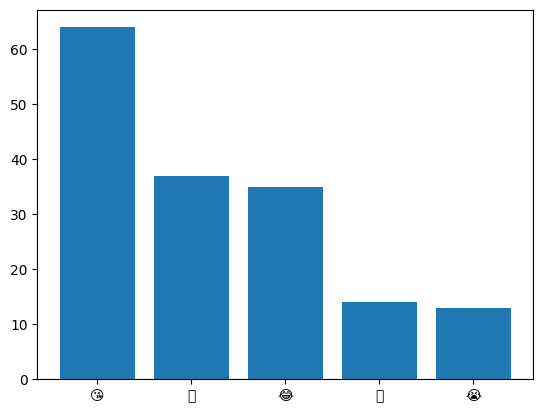

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_emoji[0].head(),df_emoji[1].head())

In [ ]:
new_df.tail()

,date,user,message
3165,2024-03-14 17:54:00,Mom,null\n
3167,2024-03-15 16:04:00,Child,Hmm\n
3168,2024-03-18 12:23:00,Mom,Beta jab free hona to call karna\n
3169,2024-03-18 12:29:00,Child,Ok mumma\n
3170,2024-03-21 13:05:00,Mom,null\n


In [ ]:
df['month_number']=df['date'].dt.month

In [ ]:
timeline= df.groupby(['year','month_number','month']).count()['message'].reset_index()
print(timeline)

    year  month_number      month  message
0   2021             4      April        5
1   2021             5        May       13
2   2021             6       June      148
3   2021             7       July        8
4   2021             8     August        7
5   2021             9  September       44
6   2021            10    October       32
7   2021            11   November       52
8   2021            12   December       82
9   2022             1    January       35
10  2022             2   February       51
11  2022             3      March      145
12  2022             4      April      101
13  2022             5        May       31
14  2022             6       June       24
15  2022             7       July       37
16  2022             8     August      128
17  2022             9  September      121
18  2022            10    October       90
19  2022            11   November       81
20  2022            12   December       68
21  2023             1    January       60
22  2023   

In [ ]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "_"+ str(timeline['year'][i]))

In [ ]:
print(time)

['April_2021', 'May_2021', 'June_2021', 'July_2021', 'August_2021', 'September_2021', 'October_2021', 'November_2021', 'December_2021', 'January_2022', 'February_2022', 'March_2022', 'April_2022', 'May_2022', 'June_2022', 'July_2022', 'August_2022', 'September_2022', 'October_2022', 'November_2022', 'December_2022', 'January_2023', 'February_2023', 'March_2023', 'April_2023', 'May_2023', 'June_2023', 'July_2023', 'August_2023', 'September_2023', 'October_2023', 'November_2023', 'December_2023', 'January_2024', 'February_2024', 'March_2024']


In [ ]:
timeline['time']=time

In [ ]:
timeline.head()

,year,month_number,month,message,time
0,2021,4,April,5,April_2021
1,2021,5,May,13,May_2021
2,2021,6,June,148,June_2021
3,2021,7,July,8,July_2021
4,2021,8,August,7,August_2021


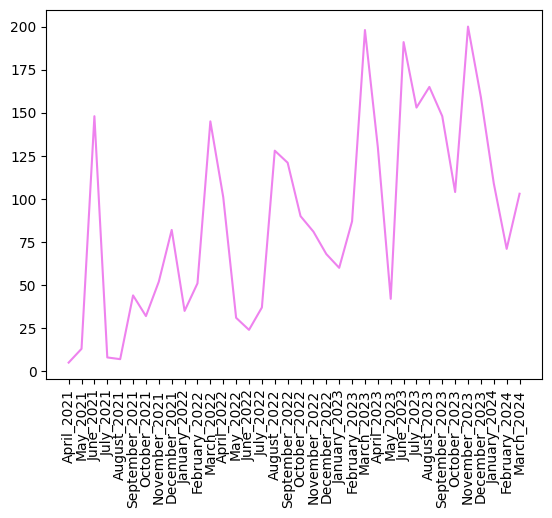

In [ ]:
plt.plot(timeline['time'],timeline['message'],color='violet')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['day_name']=df['date'].dt.day_name()

In [ ]:
daywise= df['day_name'].value_counts().reset_index()
print(daywise)

    day_name  count
0     Sunday    606
1   Thursday    535
2   Saturday    526
3     Monday    495
4    Tuesday    424
5     Friday    335
6  Wednesday    302


<BarContainer object of 7 artists>

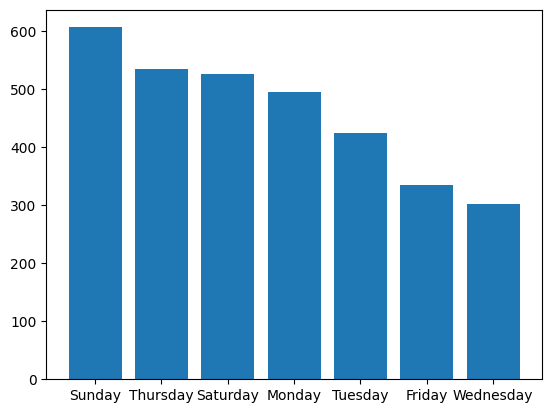

In [ ]:
plt.bar(daywise['day_name'],daywise['count'])

In [ ]:
monthwise= df['month'].value_counts().reset_index()
print(monthwise)

        month  count
0       March    446
1        June    363
2    November    333
3   September    313
4    December    309
5      August    300
6       April    236
7     October    226
8    February    209
9     January    204
10       July    198
11        May     86


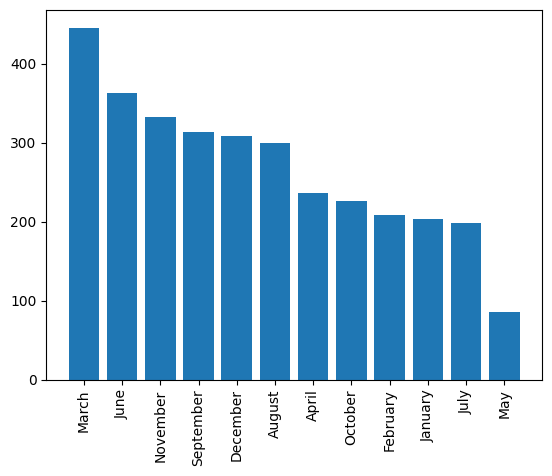

In [ ]:

plt.bar(monthwise['month'],monthwise['count'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import seaborn as sns

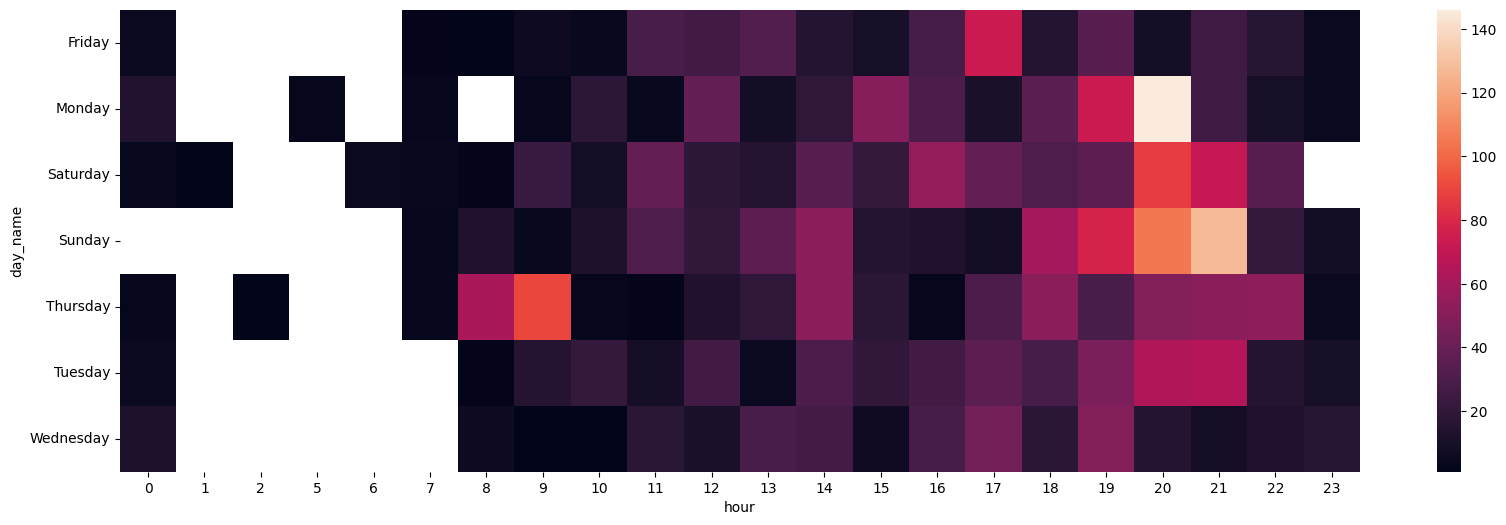

In [ ]:
pivot_table=df.pivot_table(index='day_name',columns='hour',values='message',aggfunc='count')
plt.figure(figsize=(20,6))
sns.heatmap(pivot_table)
plt.show()